<a href="https://colab.research.google.com/github/SharmaKanishkaa/Cancer-Prediction-with-KNN/blob/main/Cancer_Prediction_with_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
scaler = StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score


import warnings
warnings.filterwarnings("ignore")

# Read and Analyse Data

In [ ]:
# read data
df = pd.read_csv("/kaggle/input/cancer-data/Cancer_Data.csv")

In [ ]:
df = df.drop(['Unnamed: 32', 'id'],axis = 1)

In [ ]:
df.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


# Missing Value Analysis

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.isnull().values.any()

False

# Data Visualization

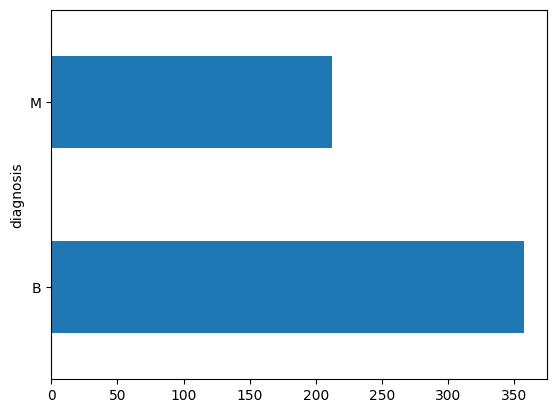

In [ ]:
df["diagnosis"].value_counts().plot.barh();

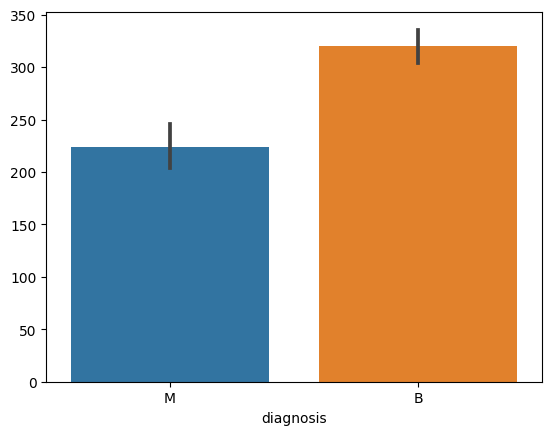

In [ ]:
sns.barplot(x = "diagnosis", y = df.diagnosis.index, data= df);

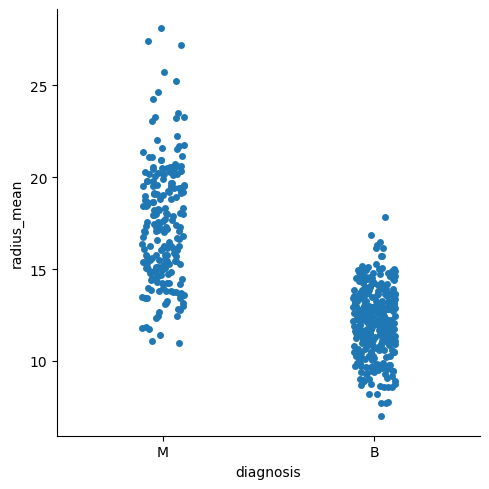

In [ ]:
sns.catplot(x = "diagnosis", y = "radius_mean", data = df);

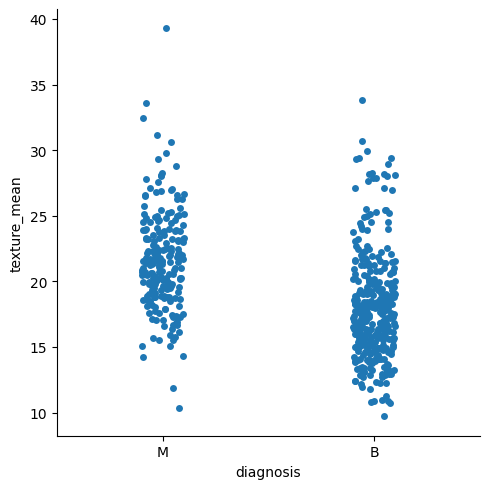

In [ ]:
sns.catplot(x = "diagnosis", y = "texture_mean", data = df);

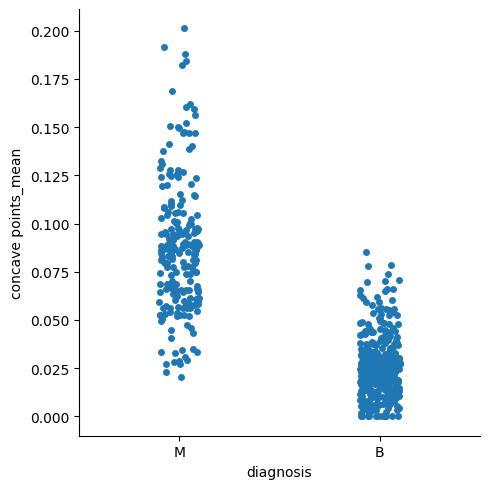

In [ ]:
sns.catplot(x = "diagnosis", y = "concave points_mean", data = df);

<Axes: xlabel='diagnosis', ylabel='radius_mean'>

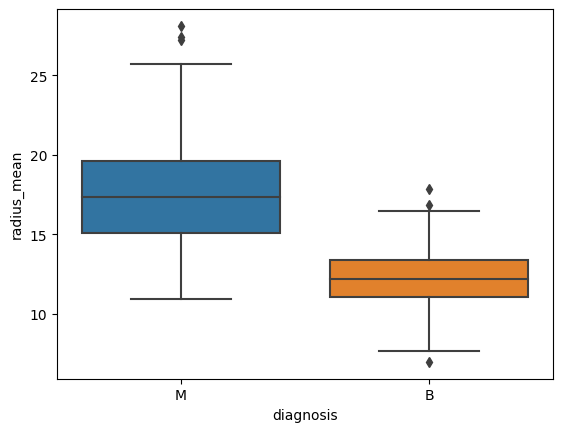

In [ ]:
sns.boxplot(x="diagnosis", y="radius_mean", data=df)

<Axes: xlabel='diagnosis', ylabel='texture_mean'>

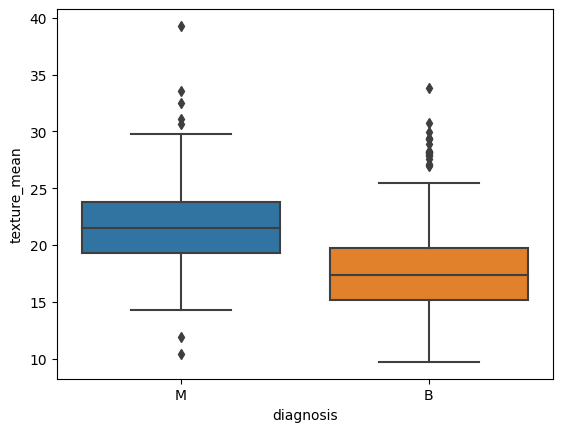

In [ ]:
sns.boxplot(x="diagnosis", y="texture_mean", data=df)

<Axes: xlabel='diagnosis', ylabel='concave points_mean'>

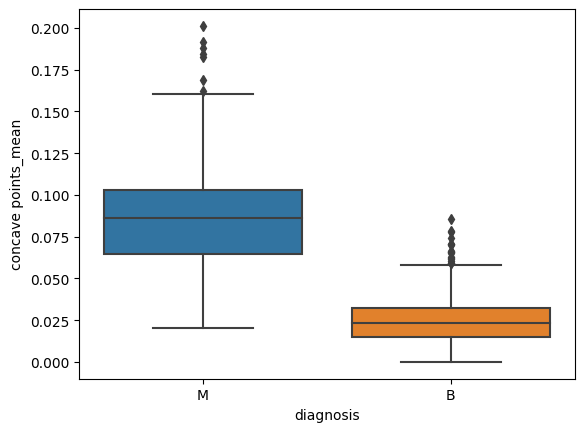

In [ ]:
sns.boxplot(x="diagnosis", y="concave points_mean", data=df)

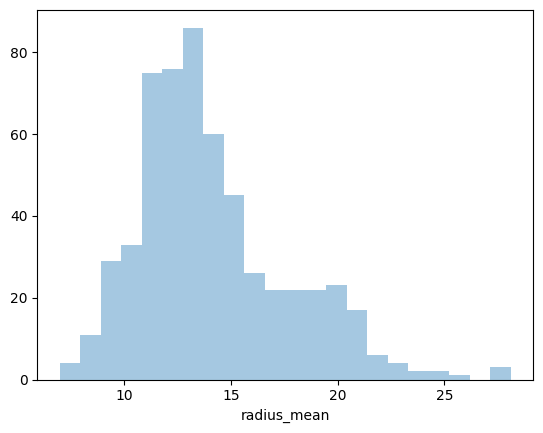

In [ ]:
sns.distplot(df.radius_mean, kde = False);

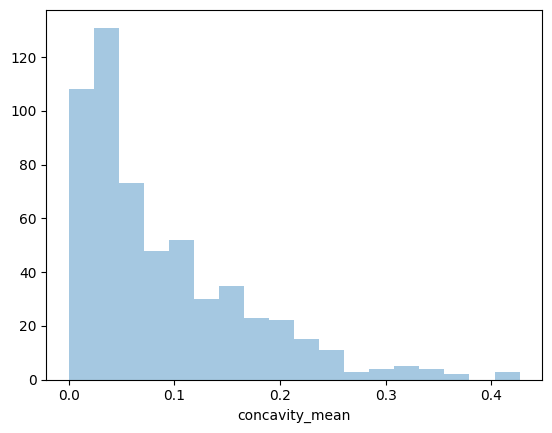

In [ ]:
sns.distplot(df.concavity_mean, kde = False);

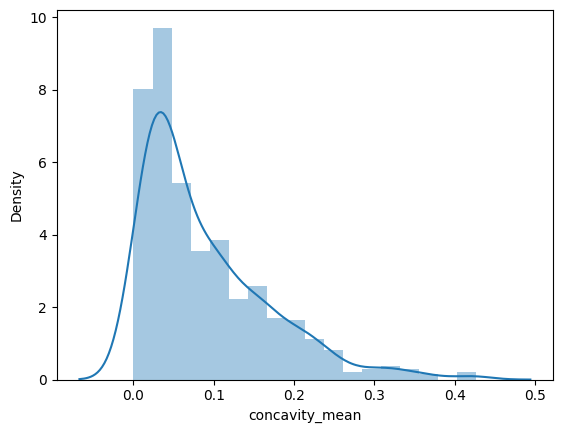

In [ ]:
sns.distplot(df.concavity_mean);

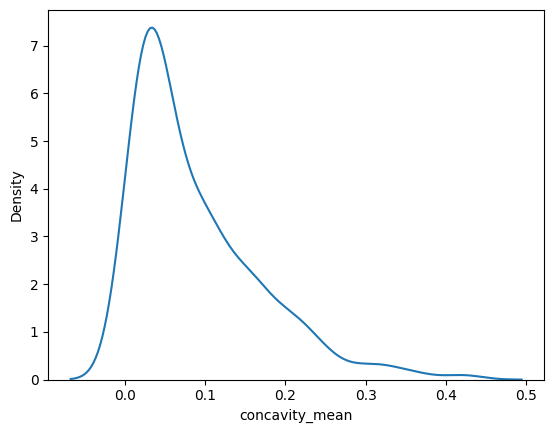

In [ ]:
sns.distplot(df.concavity_mean, hist = False);

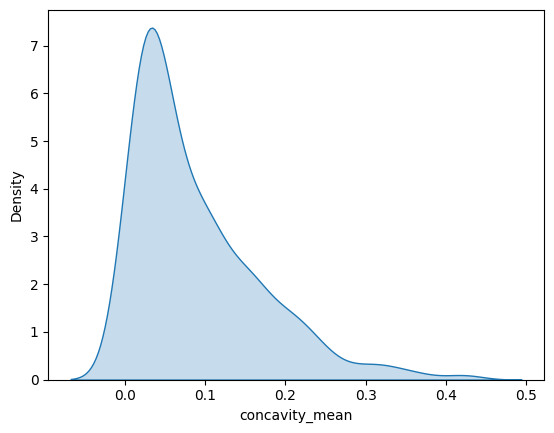

In [ ]:
sns.kdeplot(df.concavity_mean, shade = True);

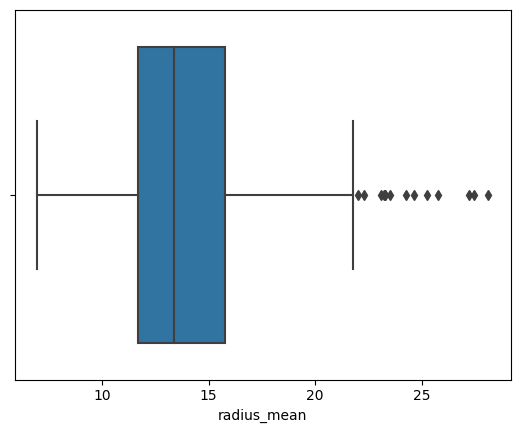

In [ ]:
sns.boxplot(x = df["radius_mean"]);

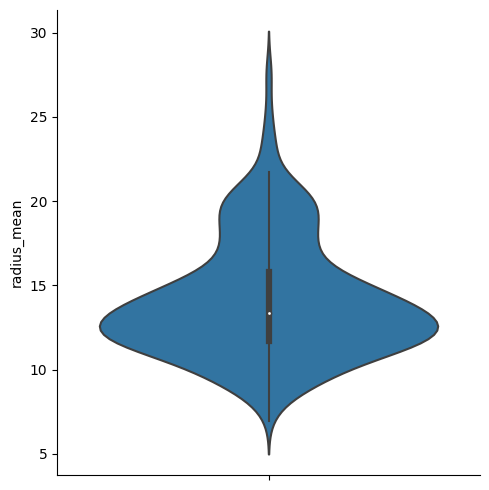

In [ ]:
sns.catplot(y = "radius_mean", kind = "violin", data = df);

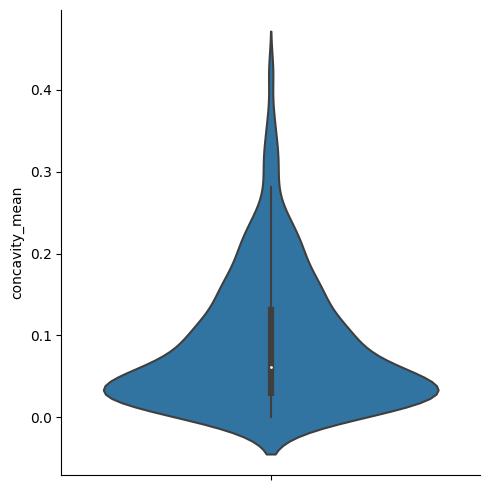

In [ ]:
sns.catplot(y = "concavity_mean", kind = "violin", data = df);

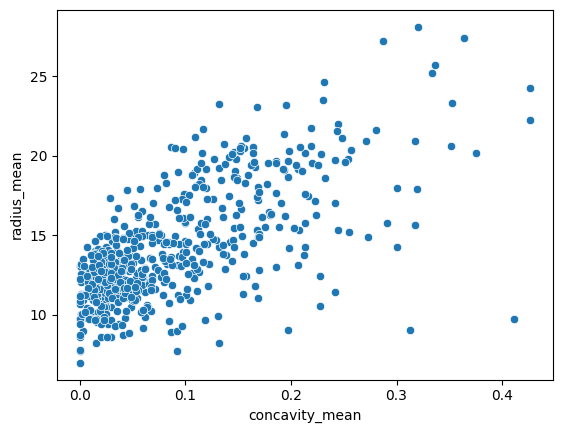

In [ ]:
sns.scatterplot(x = "concavity_mean", y = "radius_mean", data = df);

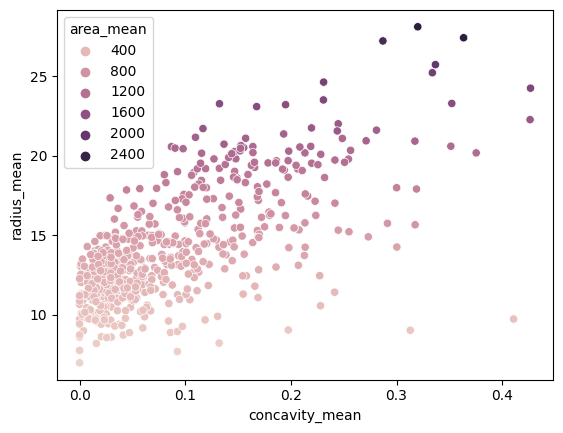

In [ ]:
sns.scatterplot(x = "concavity_mean", y = "radius_mean", hue = "area_mean",data = df);

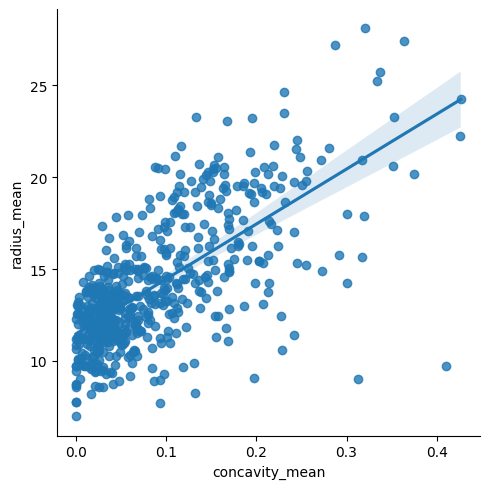

In [ ]:
sns.lmplot(x = "concavity_mean", y = "radius_mean", data = df);

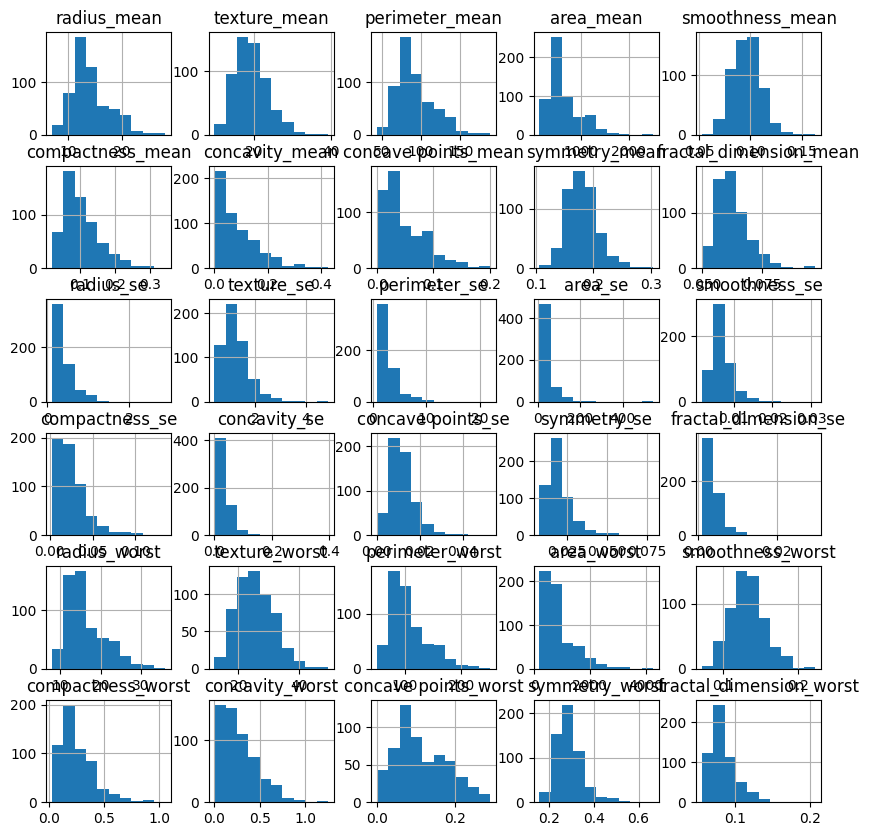

In [ ]:
df.hist(figsize = (10,10));

# Data Preprocessing

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
df_num = df.select_dtypes(include = ["float64", "int64"])

In [ ]:
df_num.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [ ]:
df_num["radius_mean"].describe()

count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: radius_mean, dtype: float64

In [ ]:
print("Mean: " + str(df_num["radius_mean"].mean()))
print("Count: " + str(df_num["radius_mean"].count()))
print("Max: " + str(df_num["radius_mean"].max()))
print("Min: " + str(df_num["radius_mean"].min()))
print("Meadian: " + str(df_num["radius_mean"].median()))
print("Standart: " + str(df_num["radius_mean"].std()))

Mean: 14.127291739894552
Count: 569
Max: 28.11
Min: 6.981
Meadian: 13.37
Standart: 3.5240488262120775


In [ ]:
df["radius_mean"].value_counts()

radius_mean
12.34    4
11.71    3
12.46    3
13.05    3
10.26    3
        ..
12.23    1
14.45    1
19.18    1
18.08    1
7.76     1
Name: count, Length: 456, dtype: int64

In [ ]:
categorical_list = ["diagnosis"]

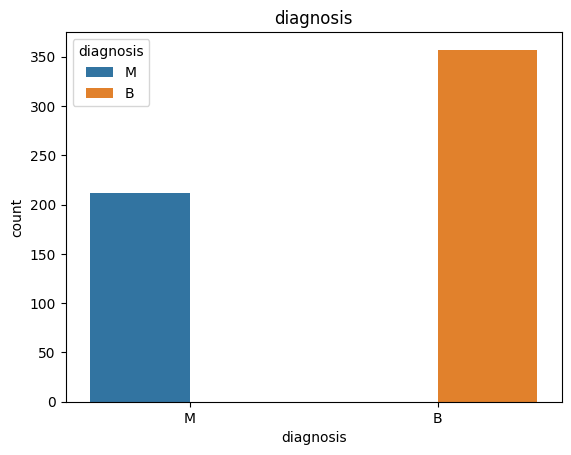

In [ ]:
df_categoric = df.loc[:, categorical_list]
for i in categorical_list:
    plt.figure()
    sns.countplot(x = i, data = df_categoric, hue = "diagnosis")
    plt.title(i)

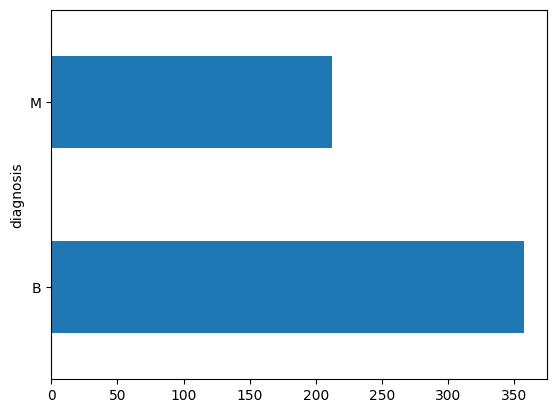

In [ ]:
df["diagnosis"].value_counts().plot.barh();

# Outlier

In [ ]:
for i in df_num:

    # IQR
    Q1 = np.percentile(df.loc[:, i],25)
    Q3 = np.percentile(df.loc[:, i],75)

    IQR = Q3 - Q1

    print("Old shape: ", df.loc[:, i].shape)

    # upper bound
    upper = np.where(df.loc[:, i] >= (Q3 +2.5*IQR))

    # lower bound
    lower = np.where(df.loc[:, i] <= (Q1 - 2.5*IQR))

    print("{} -- {}".format(upper, lower))

    try:
        df.drop(upper[0], inplace = True)
    except: print("KeyError: {} not found in axis".format(upper[0]))

    try:
        df.drop(lower[0], inplace = True)
    except:  print("KeyError: {} not found in axis".format(lower[0]))

    print("New shape: ", df.shape)

Old shape:  (569,)
(array([180, 212, 461]),) -- (array([], dtype=int64),)
New shape:  (566, 31)
Old shape:  (566,)
(array([237]),) -- (array([], dtype=int64),)
New shape:  (565, 31)
Old shape:  (565,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (565, 31)
Old shape:  (565,)
(array([ 82, 122, 164, 201, 234, 336, 349, 499, 517]),) -- (array([], dtype=int64),)
New shape:  (556, 31)
Old shape:  (556,)
(array([492]),) -- (array([], dtype=int64),)
New shape:  (555, 31)
Old shape:  (555,)
(array([ 78, 250]),) -- (array([], dtype=int64),)
New shape:  (553, 31)
Old shape:  (553,)
(array([106, 149]),) -- (array([], dtype=int64),)
New shape:  (551, 31)
Old shape:  (551,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (551, 31)
Old shape:  (551,)
(array([25]),) -- (array([], dtype=int64),)
New shape:  (550, 31)
Old shape:  (550,)
(array([  3,  70, 146, 305, 486, 487]),) -- (array([], dtype=int64),)
New shape:  (544, 31)
Old shape:  (544,)
(array([  0,  36,

# Standardization

In [ ]:
from sklearn import preprocessing

In [ ]:
preprocessing.scale(df_num)

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [ ]:
preprocessing.normalize(df_num)

array([[7.92541486e-03, 4.57286305e-03, 5.40989964e-02, ...,
        1.16920795e-04, 2.02695018e-04, 5.23808686e-05],
       [8.66575595e-03, 7.48616836e-03, 5.59882822e-02, ...,
        7.83583182e-05, 1.15852352e-04, 3.75024596e-05],
       [9.36668268e-03, 1.01087865e-02, 6.18419883e-02, ...,
        1.15596947e-04, 1.71873157e-04, 4.16624718e-05],
       ...,
       [1.16438847e-02, 1.96964025e-02, 7.59658259e-02, ...,
        9.94640269e-05, 1.55579134e-04, 5.48525170e-05],
       [9.23020523e-03, 1.31418408e-02, 6.27743569e-02, ...,
        1.18738077e-04, 1.83125480e-04, 5.55604587e-05],
       [2.31098880e-02, 7.30820427e-02, 1.42709515e-01, ...,
        0.00000000e+00, 8.55006294e-04, 2.09626935e-04]])

In [ ]:
scaler = preprocessing.MinMaxScaler(feature_range = (100,200))

In [ ]:
scaler.fit_transform(df_num)

array([[152.10374367, 102.26580994, 154.59885288, ..., 191.20274914,
        159.84624483, 141.88639643],
       [164.31444934, 127.25735543, 161.57832907, ..., 163.91752577,
        123.3589592 , 122.2878132 ],
       [160.14955748, 139.02603991, 159.57432106, ..., 183.50515464,
        140.37058939, 121.34330316],
       ...,
       [145.52510767, 162.1237741 , 144.5788128 , ..., 148.72852234,
        112.87206781, 115.19086974],
       [164.45643428, 166.35103145, 166.55379725, ..., 191.0652921 ,
        149.71417307, 145.23153614],
       [103.68687586, 150.15218126, 102.85398383, ..., 100.        ,
        125.74413562, 110.06821461]])

# LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

lbe = LabelEncoder()

In [ ]:
lbe.fit_transform(df["diagnosis"])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
df["new_diagnosis"] = lbe.fit_transform(df["diagnosis"])

In [ ]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,new_diagnosis
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440,1
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,30.73,106.20,739.3,0.17030,0.54010,0.5390,0.2060,0.4378,0.10720,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [ ]:
df["diagnosis"].str.contains("M")

1       True
2       True
4       True
5       True
8       True
       ...  
564     True
565     True
566     True
567     True
568    False
Name: diagnosis, Length: 493, dtype: bool

In [ ]:
df["new_diagnosis"] = np.where(df["diagnosis"].str.contains("M"), 1, 0)

In [ ]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,new_diagnosis
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440,1
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,30.73,106.20,739.3,0.17030,0.54010,0.5390,0.2060,0.4378,0.10720,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()

In [ ]:
lbe.fit_transform(df["diagnosis"])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,new_diagnosis
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,1
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.1859,0.09353,0.2350,...,30.73,106.2,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,1


# One Hot

In [ ]:
df_one_hot = pd.get_dummies(df, columns = ["diagnosis"], prefix = ["diagnosis"])

In [ ]:
df_one_hot.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,new_diagnosis,diagnosis_B,diagnosis_M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1,False,True
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1,False,True
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1,False,True
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,...,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,1,False,True
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.1859,0.09353,0.2350,0.07389,...,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,1,False,True


In [ ]:
pd.get_dummies(df, columns = ["diagnosis"], prefix = ["diagnosis"]).head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,new_diagnosis,diagnosis_B,diagnosis_M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1,False,True
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1,False,True
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1,False,True
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,...,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,1,False,True
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.1859,0.09353,0.2350,0.07389,...,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,1,False,True


# KNN

In [ ]:
y = df["diagnosis"]
X = df.drop(["diagnosis"], axis=1)

In [ ]:

df = pd.DataFrame(df)

df['diagnosis'] = df['diagnosis'].astype('category')

print(df.dtypes)

diagnosis                  category
radius_mean                 float64
texture_mean                float64
perimeter_mean              float64
area_mean                   float64
smoothness_mean             float64
compactness_mean            float64
concavity_mean              float64
concave points_mean         float64
symmetry_mean               float64
fractal_dimension_mean      float64
radius_se                   float64
texture_se                  float64
perimeter_se                float64
area_se                     float64
smoothness_se               float64
compactness_se              float64
concavity_se                float64
concave points_se           float64
symmetry_se                 float64
fractal_dimension_se        float64
radius_worst                float64
texture_worst               float64
perimeter_worst             float64
area_worst                  float64
smoothness_worst            float64
compactness_worst           float64
concavity_worst             

In [ ]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [ ]:
df['diagnosis'] = pd.to_numeric(df['diagnosis'], errors='coerce')

In [ ]:
df['diagnosis'] = df['diagnosis'].astype(float)

In [ ]:
df.dtypes

diagnosis                  float64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [ ]:

y = df["diagnosis"]
X = df.drop(['diagnosis'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=42)

In [ ]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [ ]:
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.9391891891891891

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95        86
         1.0       0.96      0.89      0.92        62

    accuracy                           0.94       148
   macro avg       0.94      0.93      0.94       148
weighted avg       0.94      0.94      0.94       148



In [ ]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [ ]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [ ]:
knn_cv.get_params()

{'cv': 10,
 'error_score': nan,
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 5,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'estimator': KNeighborsClassifier(),
 'n_jobs': None,
 'param_grid': {'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
         35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [ ]:
print("best score:" + str(knn_cv.best_score_))
print("best parameter: " + str(knn_cv.best_params_))

best score:0.942436974789916
best parameter: {'n_neighbors': 4}


In [ ]:
knn = KNeighborsClassifier(11)
knn_tuned = knn.fit(X_train, y_train)

In [ ]:
knn_tuned.score(X_test, y_test)

0.9324324324324325

In [ ]:
y_pred = knn_tuned.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.9324324324324325

# Gaussian Naive Bayes

In [ ]:
y = df["diagnosis"]
X = df.drop(['diagnosis'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=42)

In [ ]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB()

In [ ]:
nb_model.predict(X_test)[0:10]

array([0., 0., 1., 1., 1., 0., 0., 0., 0., 1.])

In [ ]:
nb_model.predict_proba(X_test)[0:10]

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [ ]:
y_pred = nb_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

1.0

In [ ]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

1.0

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)

scores = cross_val_score(knn_model, X, y, cv=10)

print("Cross Validation Scores:", scores)
print("Average Score:", scores.mean())

Cross Validation Scores: [0.92       0.9        0.9        0.97959184 0.97959184 0.95918367
 0.97959184 0.91836735 0.93877551 0.91836735]
Average Score: 0.9393469387755102


# Artificial Neural Networks

In [ ]:
y = df["diagnosis"]
X = df.drop(['diagnosis'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_test_scaled[0:5]

array([[-4.38630628e-01, -1.65686889e+00, -4.69448559e-01,
        -4.77622507e-01, -3.80265762e-01, -7.34572115e-01,
        -6.76539132e-01, -4.99560550e-01, -4.14294149e-01,
        -7.05149233e-01, -1.13849937e+00, -1.25762064e+00,
        -1.15750668e+00, -8.23862416e-01, -1.10916357e+00,
        -8.87048260e-01, -7.11956832e-01, -8.79443830e-01,
        -1.19982524e+00, -8.50497037e-01, -4.78439436e-01,
        -1.02168026e+00, -5.27836847e-01, -4.94119359e-01,
        -7.63351130e-02, -2.15614159e-01, -3.59603211e-01,
         1.91906441e-02,  4.84936367e-01, -4.31117330e-01,
        -6.79606067e-01],
       [ 2.94639790e-01, -9.44933036e-01,  3.09362058e-01,
         1.35003764e-01,  1.23696330e+00,  6.96160801e-01,
         2.57036396e-01,  7.32035928e-01,  1.20910637e+00,
         9.42079548e-02,  5.53785162e-01, -8.45462186e-01,
         6.73898761e-01,  2.09021464e-01, -5.06629721e-01,
         1.09620555e+00,  4.39174350e-01,  7.22063704e-01,
         5.18718428e-01,  3.82

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlpc = MLPClassifier().fit(X_train_scaled, y_train)

In [ ]:
y_pred = mlpc.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

1.0